In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import pandas as pd


from skimage.morphology import watershed
from skimage.feature import peak_local_max
from PIL import Image

from skimage.morphology import skeletonize, thin, skeletonize_3d
from skimage.util import invert
from skimage import measure
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
import seaborn as sns
sns.reset_orig()

from skimage import restoration

from skimage import exposure
from skimage.filters import gaussian

from scipy import ndimage

from time import time

from skimage.color import rgb2gray


from skimage.filters.rank import entropy
import scipy



import networkx as nx
from scipy import interpolate

from skimage.segmentation import random_walker
from skimage.data import binary_blobs
from skimage.exposure import rescale_intensity
import glob

from skimage.morphology import disk
from skimage import io
from skimage.morphology import remove_small_objects

import threading

import tifffile

/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/spencerlab/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [2]:
def getNeighbors(arr):
    arr2 = (arr.copy())*0
    
    #bottom right
    arr2[:-1,:-1] += arr[1:,1:]
    
    #bottom 
    arr2[:-1] += arr[1:]
    
    #bottom left
    arr2[:-1, 1:] += arr[1:, :-1]
    
    
    
    
    #top right
    arr2[1:, :-1] += arr[:-1, 1:]
    
    #top
    arr2[1:] += arr[:-1]
    
    #top left
    arr2[1:, 1:] += arr[:-1, :-1]
    
    
    
    
    #right
    arr2[:, :-1] += arr[:, 1:]
    
    #left
    arr2[:, 1:] += arr[:, :-1]
    
    return arr2*(arr!=0)

In [30]:
image_list = []
ctr = 0 
for filename in glob.glob('skel_lab_2D/*.tif'): #assuming gif
    
    
    im=np.asarray( Image.open('skel_lab_2D/'+str(ctr) +'.tif') )
    image_list.append(im)
    
    ctr=ctr+1

In [31]:
neb_0 = getNeighbors( (image_list[0]!=0)*1)

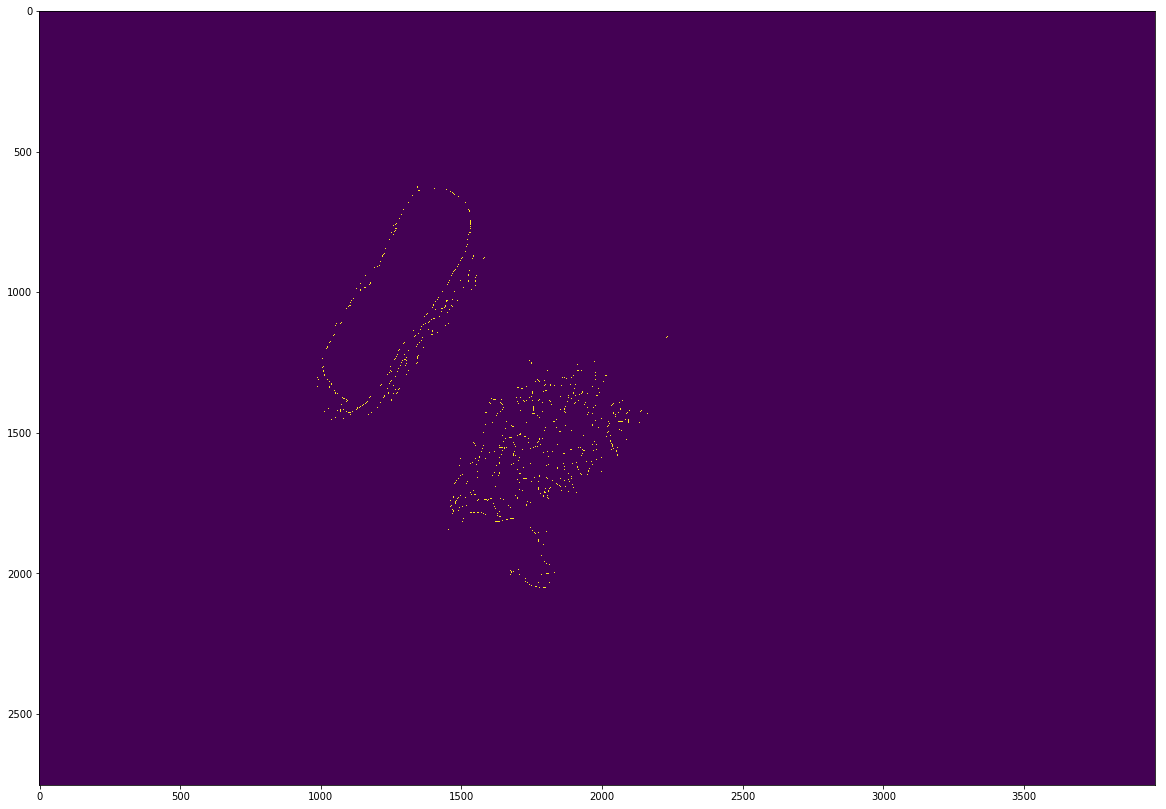

In [32]:
plt.figure(figsize=(20,20))
plt.imshow(neb_0==2)

In [34]:
Image.fromarray( ((neb_0==2)*255).astype('uint8') ).show()

In [25]:
np.unique(neb_0)

array([0, 1, 2, 3, 4, 5, 6])